In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font' , family = 'NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
import warnings
warnings.filterwarnings('ignore')

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
soccer = pd.read_csv('C:/k_digital/Pythonbasic/source/soccer.csv')

In [5]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/9d/06/059a7e33548acf6c7bd29f96b2e495571797b4397353bf79631559b97948/wordcloud-1.9.2-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/153.1 kB ? eta -:--:--
   ---------------------------------------- 153.1/153.1 kB 8.9 MB/s eta 0:00:00


In [6]:
import seaborn as sns
from wordcloud import WordCloud

In [7]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41540 entries, 0 to 41539
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41540 non-null  object
 1   home_team   41540 non-null  object
 2   away_team   41540 non-null  object
 3   home_score  41540 non-null  int64 
 4   away_score  41540 non-null  int64 
 5   tournament  41540 non-null  object
 6   city        41540 non-null  object
 7   country     41540 non-null  object
 8   neutral     41540 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [8]:
soccer

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41535,2019-11-19,Kyrgyzstan,Tajikistan,1,1,FIFA World Cup qualification,Bishkek,Kyrgyzstan,False
41536,2019-11-19,Vietnam,Thailand,0,0,FIFA World Cup qualification,Hanoi,Vietnam,False
41537,2019-11-19,Malaysia,Indonesia,2,0,FIFA World Cup qualification,Kuala Lumpur,Malaysia,False
41538,2019-11-19,Turkmenistan,Sri Lanka,2,0,FIFA World Cup qualification,Ashgabat,Turkmenistan,False


In [14]:
soccer.date = pd.to_datetime(soccer.date)

In [15]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41540 entries, 0 to 41539
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        41540 non-null  datetime64[ns]
 1   home_team   41540 non-null  object        
 2   away_team   41540 non-null  object        
 3   home_score  41540 non-null  int64         
 4   away_score  41540 non-null  int64         
 5   tournament  41540 non-null  object        
 6   city        41540 non-null  object        
 7   country     41540 non-null  object        
 8   neutral     41540 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.6+ MB


In [35]:
soccer['결과(홈팀기준)'] = soccer.index

In [37]:
# 승 , 무 , 패를 새로운 컬럼에 기록한다.
for i in range(len(soccer)):
    if soccer['home_score'][i] > soccer['away_score'][i]:
        soccer['결과(홈팀기준)'][i] = '승'
    elif soccer['home_score'][i] < soccer['away_score'][i]:
        soccer['결과(홈팀기준)'][i] = '패'
    else:
        soccer['결과(홈팀기준)'][i] = '무'
    

In [39]:
# 경기가 진행된 지역이 중립구역인 것만 가져오기
soccer1 = soccer.loc[(soccer.neutral == False),:]
soccer1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,결과(홈팀기준)
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,무
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,승
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,승
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,무
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,승
...,...,...,...,...,...,...,...,...,...,...
41537,2019-11-19,Malaysia,Indonesia,2,0,FIFA World Cup qualification,Kuala Lumpur,Malaysia,False,승
41538,2019-11-19,Turkmenistan,Sri Lanka,2,0,FIFA World Cup qualification,Ashgabat,Turkmenistan,False,승
41529,2019-11-19,Hong Kong,Cambodia,2,0,FIFA World Cup qualification,Hong Kong,Hong Kong,False,승
41502,2019-11-19,Germany,Northern Ireland,6,1,UEFA Euro qualification,Frankfurt,Germany,False,승


In [53]:
soccer1.loc[soccer1.home_team == team , '결과(홈팀기준)'].index

Int64Index([    0,     2,     4,     5,     8,     9,    13,    15,    21,
               23,
            ...
            39598, 39994, 40044, 40168, 40340, 40698, 41042, 41095, 41260,
            41509],
           dtype='int64', length=365)

In [68]:
round(win/len(soccer1.loc[soccer1.home_team == 'Scotland' , '결과(홈팀기준)']) * 100 , 2)

57.81

In [250]:
# 홈팀 승률
def home_win(team):
    win = 0
    for i in soccer1.loc[soccer1.home_team == team , '결과(홈팀기준)'].index:
        if soccer1.loc[soccer1.home_team == team , '결과(홈팀기준)'][i] =='승':
            win +=1
        else:
            continue
    print('{}의 홈팀 승률 : {}%'.format(team ,round(win/len(soccer1.loc[soccer1.home_team == team , '결과(홈팀기준)']) * 100 , 2)))

In [90]:
# 어웨이팀 승률
def away_win(team):
    win1 = 0
    for i in soccer1.loc[soccer1.away_team == team , '결과(홈팀기준)'].index:
        if soccer1.loc[soccer1.away_team == team , '결과(홈팀기준)'][i] =='패':
            win1 +=1
        else:
            continue
    print('{}의 홈팀 승률 : {}%'.format(team ,round(win/len(soccer1.loc[soccer1.away_team == team , '결과(홈팀기준)']) * 100 , 2)))

In [266]:
def home_win_dict(team):
    win = 0
    for i in soccer.loc[soccer.home_team == team , '결과(홈팀기준)'].index:
        if soccer.loc[soccer.home_team == team , '결과(홈팀기준)'][i] =='승':
            win +=1
        else:
            continue
    return {team : round(win1/len(soccer.loc[soccer.home_team == team , '결과(홈팀기준)']) * 100 , 2)}

In [242]:
def away_win_dict(team):
    win1 = 0
    for i in soccer.loc[soccer.away_team == team , '결과(홈팀기준)'].index:
        if soccer.loc[soccer.away_team == team , '결과(홈팀기준)'][i] =='패':
            win1 +=1
        else:
            continue
    return {team : round(win1/len(soccer.loc[soccer.away_team == team , '결과(홈팀기준)']) * 100 , 2)}

In [213]:
away = pd.DataFrame(values , keys_list , columns = ['어웨이팀 승률']).reset_index().rename(columns = {'index' : '나라'})
away

,나라,어웨이팀 승률
0,England,53.73
1,Scotland,39.68
2,Wales,25.78
3,Northern Ireland,17.80
4,Canada,24.55
...,...,...
291,Barawa,0.00
292,Parishes of Jersey,0.00
293,Chameria,100.00
294,Saint Helena,0.00


In [217]:
# 어웨이에서 한 경기만 치루고 이겼으면 승률이 100%이므로 시각화에 의미가 없다.
# 그러므로 100%인 나라를 제외하고 어웨이팀 승률이 가장 높은 15팀을 가져온다.
away__win = away.loc[away['어웨이팀 승률'] <100 , :].sort_values('어웨이팀 승률' , ascending = False).head(15)

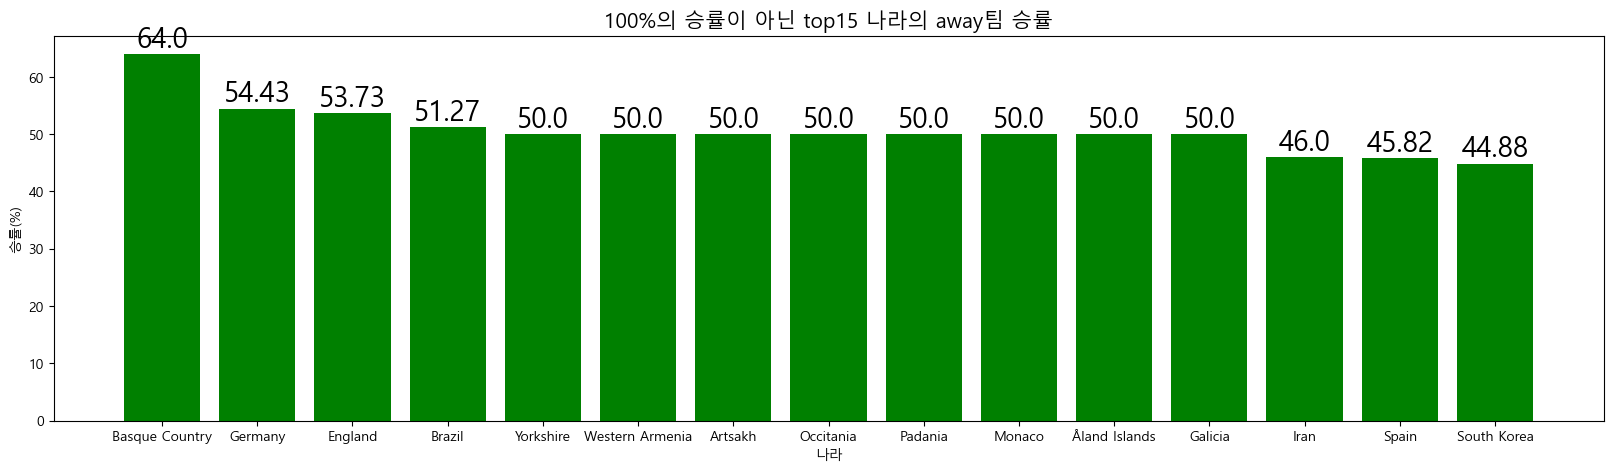

In [397]:
plt.figure(figsize = (20,5))
bars = plt.bar(x = away__win['나라'] , height = away__win['어웨이팀 승률'] , color = 'green')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom' , size = 20)
plt.xlabel('나라')
plt.ylabel('승률(%)')
plt.title('100%의 승률이 아닌 top15 나라의 away팀 승률' , size = 15)
plt.show()

In [281]:
#전체 경기중에 가장 많은 홈 경기를 치룬 나라
soccer.home_team.value_counts().head(10).index.tolist()

['Brazil',
 'Argentina',
 'Mexico',
 'Germany',
 'England',
 'Sweden',
 'France',
 'South Korea',
 'Hungary',
 'Italy']

In [235]:
team_list = soccer.home_team.value_counts().head(10).index

In [244]:
a = []
for i in team_list:
    a.append(away_win_dict(i))

In [245]:
a

[{'Brazil': 53.51},
 {'Argentina': 38.19},
 {'Mexico': 38.48},
 {'Germany': 53.72},
 {'England': 51.66},
 {'Sweden': 40.75},
 {'France': 38.48},
 {'South Korea': 44.92},
 {'Hungary': 37.47},
 {'Italy': 40.9}]

In [400]:
x = pd.DataFrame(a)
x

,Brazil,Argentina,Mexico,Germany,England,Sweden,France,South Korea,Hungary,Italy
0,53.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,38.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,38.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,53.72,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,51.66,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,40.75,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,38.48,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.92,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.47,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.9


In [401]:
x.columns

Index(['Brazil', 'Argentina', 'Mexico', 'Germany', 'England', 'Sweden',
       'France', 'South Korea', 'Hungary', 'Italy'],
      dtype='object')

In [402]:
x.values

array([[53.51,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan],
       [  nan, 38.19,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan],
       [  nan,   nan, 38.48,   nan,   nan,   nan,   nan,   nan,   nan,
          nan],
       [  nan,   nan,   nan, 53.72,   nan,   nan,   nan,   nan,   nan,
          nan],
       [  nan,   nan,   nan,   nan, 51.66,   nan,   nan,   nan,   nan,
          nan],
       [  nan,   nan,   nan,   nan,   nan, 40.75,   nan,   nan,   nan,
          nan],
       [  nan,   nan,   nan,   nan,   nan,   nan, 38.48,   nan,   nan,
          nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan, 44.92,   nan,
          nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan, 37.47,
          nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
        40.9 ]])

In [ ]:
df = pd.DataFrame(data, index=x.columns, columns='rate')

In [246]:
keys_list = [value for dictionary in a for value in dictionary.values()]

In [247]:
keys_list

[53.51, 38.19, 38.48, 53.72, 51.66, 40.75, 38.48, 44.92, 37.47, 40.9]

In [267]:
b = []
for i in team_list:
    b.append(home_win_dict(i))

In [268]:
b

[{'Brazil': 26.06},
 {'Argentina': 27.01},
 {'Mexico': 28.85},
 {'Germany': 29.25},
 {'England': 29.72},
 {'Sweden': 30.45},
 {'France': 30.58},
 {'South Korea': 31.83},
 {'Hungary': 32.67},
 {'Italy': 33.41}]

In [269]:
keys_list_b = [value for dictionary in b for value in dictionary.values()]

In [270]:
keys_list_b

[26.06, 27.01, 28.85, 29.25, 29.72, 30.45, 30.58, 31.83, 32.67, 33.41]

In [263]:
keys_list

[53.51, 38.19, 38.48, 53.72, 51.66, 40.75, 38.48, 44.92, 37.47, 40.9]

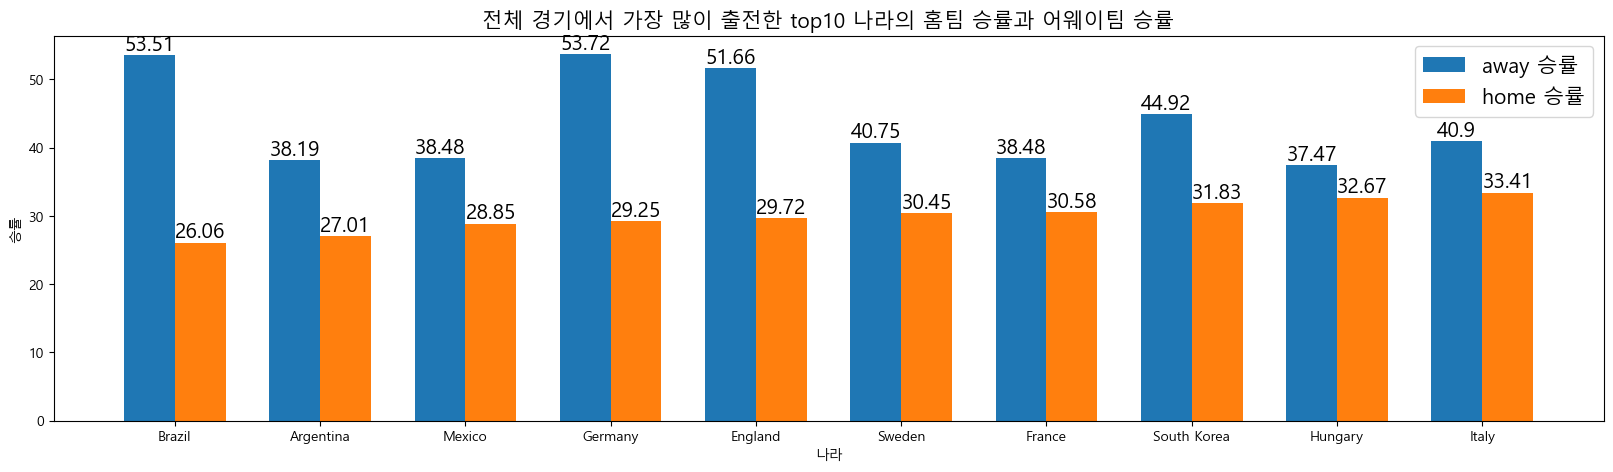

In [277]:
plt.figure(figsize = (20,5))
team_list = soccer.home_team.value_counts().head(10).index
away_team_list = keys_list
home_team_list = keys_list_b
bar_width = 0.35  # 막대의 너비

# X 축 위치 계산
x = range(len(team_list))

# away팀 승률 막대그래프
bars = plt.bar(x, away_team_list, width=bar_width, label='away 승률')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom' , size = 15)

# home팀 승률 막대그래프(away팀 오른쪽에)
x = [i + bar_width for i in x]
bars2 = plt.bar(x, home_team_list, width=bar_width, label='home 승률')
for bar in bars2:
    height = bar.get_height()
    plt.annotate(f'{height}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom' , size = 15)

plt.xlabel('나라')
plt.ylabel('승률')
plt.xticks([i + bar_width / 2 for i in range(len(team_list))], team_list)
plt.legend(fontsize = 15)
plt.title('전체 경기에서 가장 많이 출전한 top10 나라의 홈팀 승률과 어웨이팀 승률' , size = 15)
plt.show()

In [278]:
soccer

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,결과(홈팀기준)
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,무
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,승
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,승
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,무
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,승
...,...,...,...,...,...,...,...,...,...,...
41537,2019-11-19,Malaysia,Indonesia,2,0,FIFA World Cup qualification,Kuala Lumpur,Malaysia,False,승
41538,2019-11-19,Turkmenistan,Sri Lanka,2,0,FIFA World Cup qualification,Ashgabat,Turkmenistan,False,승
41529,2019-11-19,Hong Kong,Cambodia,2,0,FIFA World Cup qualification,Hong Kong,Hong Kong,False,승
41502,2019-11-19,Germany,Northern Ireland,6,1,UEFA Euro qualification,Frankfurt,Germany,False,승


# 11월 1일부터 11월 19일까지의 경기를 soccer2에 담기

In [303]:
date_time = pd.date_range('2019.11.02' , periods = 19)
date_time

DatetimeIndex(['2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05',
               '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09',
               '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19', '2019-11-20'],
              dtype='datetime64[ns]', freq='D')

In [306]:
soccer2 = soccer[soccer.date == '2019-11-01']
soccer2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,결과(홈팀기준)


In [307]:

for i in date_time:
    soccer2 = pd.concat([soccer2 , soccer[soccer.date == i]])

In [321]:
soccer2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,결과(홈팀기준)
41354,2019-11-07,Egypt,Liberia,1,0,Friendly,Alexandria,Egypt,False,승
41355,2019-11-07,Nicaragua,Cuba,0,0,Friendly,Managua,Nicaragua,False,무
41356,2019-11-09,Malaysia,Tajikistan,1,0,Friendly,Kuala Lumpur,Malaysia,False,승
41357,2019-11-09,Namibia,Zambia,0,2,Friendly,Windhoek,Namibia,False,패
41358,2019-11-09,Uzbekistan,Kyrgyzstan,3,1,Friendly,Tashkent,Uzbekistan,False,승
...,...,...,...,...,...,...,...,...,...,...
41537,2019-11-19,Malaysia,Indonesia,2,0,FIFA World Cup qualification,Kuala Lumpur,Malaysia,False,승
41538,2019-11-19,Turkmenistan,Sri Lanka,2,0,FIFA World Cup qualification,Ashgabat,Turkmenistan,False,승
41529,2019-11-19,Hong Kong,Cambodia,2,0,FIFA World Cup qualification,Hong Kong,Hong Kong,False,승
41502,2019-11-19,Germany,Northern Ireland,6,1,UEFA Euro qualification,Frankfurt,Germany,False,승


In [311]:
soccer2.home_team.unique()

array(['Egypt', 'Nicaragua', 'Malaysia', 'Namibia', 'Uzbekistan',
       'Trinidad and Tobago', 'Burkina Faso', 'Malawi', 'Sudan',
       'Central African Republic', 'Sierra Leone', 'Cameroon', 'Senegal',
       'Nigeria', 'Guinea-Bissau', 'Angola', 'DR Congo', 'Mozambique',
       'Togo', 'Bulgaria', 'England', 'Czech Republic', 'Portugal',
       'Algeria', 'France', 'Albania', 'Mali', 'Martinique', 'Curaçao',
       'Saint Kitts and Nevis', 'Belize', 'Bahamas', 'Serbia', 'Turkey',
       'Turks and Caicos Islands', 'Ghana', 'Cambodia',
       'Republic of Ireland', 'Ukraine', 'Maldives', 'Syria', 'Jordan',
       'Kuwait', 'Qatar', 'Hong Kong', 'Oman', 'Iraq', 'Ecuador',
       'Myanmar', 'Kyrgyzstan', 'Vietnam', 'Lebanon', 'Turkmenistan',
       'Yemen', 'Afghanistan', 'Tunisia', 'Denmark', 'Morocco',
       'Tanzania', 'Spain', 'Romania', 'Switzerland', 'Norway',
       'Bosnia and Herzegovina', 'Antigua and Barbuda', 'Zimbabwe',
       'Finland', 'Guyana', 'United States', 'Surin

In [333]:
# 각 팀에서 홈팀의 득점수와 어웨이팀의 득점수를 출력하고 비교.
def goal(team):
    g = 0
    for i in soccer2.loc[soccer2.home_team == team , '결과(홈팀기준)'].index:
        g += soccer2.home_score[i]
    return {team : g}

In [334]:
goal('Brazil')

{'Brazil': 3}

In [335]:
homewin = []
for i in soccer2.home_team.unique():
    homewin.append(goal(i))

In [336]:
homewin

[{'Egypt': 2},
 {'Nicaragua': 1},
 {'Malaysia': 5},
 {'Namibia': 2},
 {'Uzbekistan': 7},
 {'Trinidad and Tobago': 15},
 {'Burkina Faso': 0},
 {'Malawi': 1},
 {'Sudan': 4},
 {'Central African Republic': 2},
 {'Sierra Leone': 1},
 {'Cameroon': 0},
 {'Senegal': 2},
 {'Nigeria': 2},
 {'Guinea-Bissau': 3},
 {'Angola': 1},
 {'DR Congo': 0},
 {'Mozambique': 2},
 {'Togo': 0},
 {'Bulgaria': 1},
 {'England': 7},
 {'Czech Republic': 2},
 {'Portugal': 6},
 {'Algeria': 5},
 {'France': 2},
 {'Albania': 2},
 {'Mali': 2},
 {'Martinique': 1},
 {'Curaçao': 1},
 {'Saint Kitts and Nevis': 0},
 {'Belize': 2},
 {'Bahamas': 3},
 {'Serbia': 5},
 {'Turkey': 0},
 {'Turks and Caicos Islands': 3},
 {'Ghana': 2},
 {'Cambodia': 1},
 {'Republic of Ireland': 4},
 {'Ukraine': 1},
 {'Maldives': 4},
 {'Syria': 3},
 {'Jordan': 5},
 {'Kuwait': 9},
 {'Qatar': 2},
 {'Hong Kong': 2},
 {'Oman': 5},
 {'Iraq': 2},
 {'Ecuador': 3},
 {'Myanmar': 5},
 {'Kyrgyzstan': 1},
 {'Vietnam': 1},
 {'Lebanon': 0},
 {'Turkmenistan': 5},
 {'Ye

In [344]:
goal_total = [value for dictionary in homewin for value in dictionary.values()]

In [343]:
goal_country = [key for dictionary in homewin for key in dictionary.keys()]

In [353]:
goal201911 = pd.DataFrame(goal_total , goal_country)
goal201911 = goal201911.reset_index().rename(columns = {'index' : '나라' , 0 : '골'})

In [385]:
goaltop20['나라'].tolist()

['Trinidad and Tobago',
 'Spain',
 'Germany',
 'Guadeloupe',
 'Italy',
 'Kuwait',
 'England',
 'Uzbekistan',
 'Portugal',
 'Denmark',
 'Belgium',
 'Netherlands',
 'Serbia',
 'Croatia',
 'Oman',
 'Algeria',
 'Turkmenistan',
 'Jordan',
 'Myanmar',
 'Guatemala']

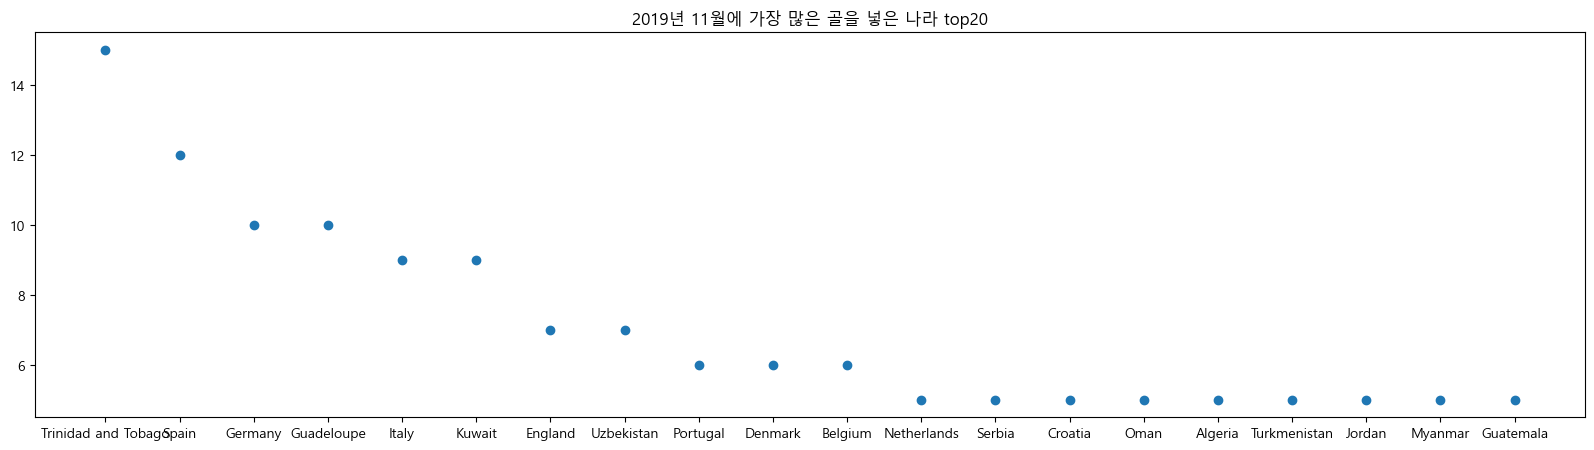

In [393]:
plt.figure(figsize=(20, 5))
plt.scatter(goaltop20['나라'] , goaltop20['골'])
plt.title('2019년 11월에 가장 많은 골을 넣은 나라 top20')
plt.show()